<a href="https://colab.research.google.com/github/rossl18/NumericalMethods/blob/main/SplinesAndPolynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question One
import numpy as np
import sympy as sym
from sympy import symbols, diff, factorial, simplify, expand
def lagrange(x_values, y_values):
    x = symbols('x')
    n = len(x_values) - 1
    result = 0.0
    for i in range(n + 1):
        term = y_values[i]
        for j in range(n + 1):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    s = simplify(result)
    p = expand(s)
    return p
def upper_bound(polynomial, x_values):
    x = symbols('x')
    third_derivative = diff(polynomial, x, 3)
    differences = np.diff(x_values)
    max_difference = np.max(np.abs(differences))
    max_third_derivative = np.max([abs(third_derivative.subs(x, xi)) for xi in x_values])
    upper_bound = max_third_derivative / (factorial(3 + 1) * max_difference ** 3)
    return upper_bound
x = [0, 2, 3]
y = [1, 3, 0]
p = lagrange(x, y)
print(f"The interpolating polynomial in standard form is: {p}")
error = upper_bound(p, x)
print(f"The upper bound for interpolation error at x=1 is: {error}")
#The interpolating polynomial in standard form is: -4(x^2)/3 + (11x)/3 + 1 and the upper bound for interpolation error at x=1 is: 0

The interpolating polynomial in standard form is: -4*x**2/3 + 11*x/3 + 1
The upper bound for interpolation error at x=1 is: 0


In [ ]:
#Question Two
#a)
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import polynomial as npp
import scipy as sp
f = lambda x: 1/(1+12*x*x)
x = [-1,1]
n = 11
xs = np.linspace(x[0],x[1],n)
ys = f(xs)

p_std = sp.interpolate.lagrange(xs,ys)
print(f"\nstandard monomial:\n\n{p_std}\n") # meh print








standard monomial:

        10             9       8             7         6            5
-95.92 x  + 1.184e-12 x + 219 x + 2.944e-12 x - 175.2 x - 2.17e-13 x
          4             3        2
 + 61.53 x - 4.343e-14 x - 10.3 x - 7.73e-17 x + 1



In [ ]:
#b)
xs_rts = npp.chebyshev.chebpts2(n) # chebyshev roots
ys_rts = f(xs_rts) # np.exp(xs) # system ~ truth
p_che = npp.chebyshev.Chebyshev.fit(xs_rts,ys_rts,deg=n-1)
print(f"\nchebyshev polynomial:\n\n{p_che}\n") # pretty print



chebyshev polynomial:

0.27921949 - (3.39934989e-17)·T₁(x) - 0.3181788·T₂(x) +
(7.05786055e-17)·T₃(x) + 0.18397823·T₄(x) + (1.03163462e-16)·T₅(x) -
0.11110374·T₆(x) - (4.48223815e-17)·T₇(x) + 0.07526382·T₈(x) -
(6.48931063e-17)·T₉(x) - 0.03225592·T₁₀(x)



In [ ]:
#c)
n = 11
x = sym.symbols('x')
derivative_order = n + 1
num_points = derivative_order + 2
num_points = derivative_order + 3 if derivative_order % 2 == 0 else derivative_order + 2
derivative_n_plus_1 = sp.misc.derivative(f, 0.9, dx=1e-6, n=derivative_order, order=num_points)
max_derivative_value = np.max(np.abs(derivative_n_plus_1))
error_bound_che = max_derivative_value / (2 ** n)
print(error_bound_che)


3.114709553643514e+55


<ipython-input-13-33d920c2a4d5>:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative_n_plus_1 = sp.misc.derivative(f, 0.9, dx=1e-6, n=derivative_order, order=num_points)


In [ ]:
#d)
x_check = 0.9
f_check = f(x_check)

p_check_std = np.polyval(p_std,x_check)
print(f"\nstandard monomial, P({x_check})= {p_check_std}, error = {abs(f_check-p_check_std)}")
c_che = np.array(list(p_che))
p_check_che = npp.chebyshev.chebval(x_check,c_che)
print(f"\nchebyshev, P({x_check})= {p_check_che}, error = {abs(f_check-p_check_che)}")


standard monomial, P(0.9)= 0.7259540330684146, error = 0.6326704509788623

chebyshev, P(0.9)= 0.07940698106834945, error = 0.013876601021202778


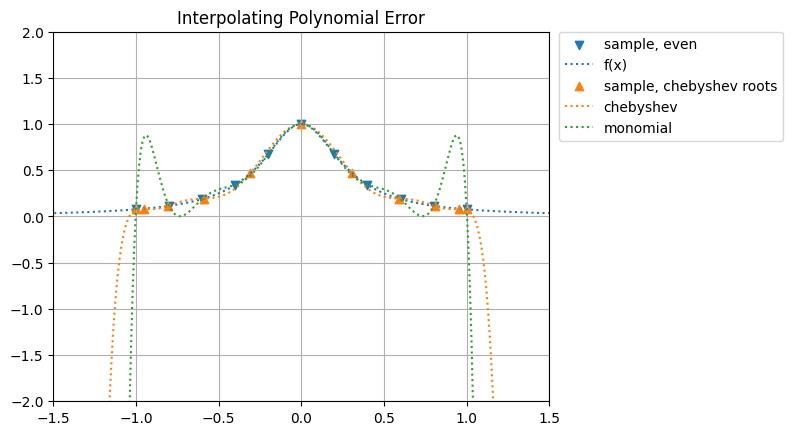

In [ ]:
#e)
x_wider = [-2,2]
h = 0.01
xs_moar = np.arange(x_wider[0],x_wider[1]+h/2,h)
ys_moar = f(xs_moar)
c_che = np.array(list(p_che))
ps_che = npp.chebyshev.chebval(xs_moar,c_che)
ps_std = npp.polynomial.Polynomial(p_std.coef[::-1])(xs_moar)

plt.scatter(xs,ys,c="C0",marker="v",label="sample, even")
plt.plot(xs_moar,ys_moar,c="C0",linestyle=":",label="f(x)")
plt.scatter(xs_rts,ys_rts,c="C1",marker="^",label="sample, chebyshev roots")
plt.plot(xs_moar,ps_che,c="C1",linestyle=":",label="chebyshev")
plt.plot(xs_moar,ps_std,c="C2",linestyle=":",label="monomial")
plt.xlim(-1.5, 1.5)
plt.title("Interpolating Polynomial Error")
plt.ylim(-2, 2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()




spline 1 : 

3.0 + 2.66666667·x + 0.0·x² - 0.66666667·x³

spline 2 : 

            3         2
0.3333 (x-1) - 2 (x-1) + 0.6667 (x-1) + 5

spline 3 : 

            3         2
0.3333 (x-2) - 1 (x-2) - 2.333 (x-2) + 4


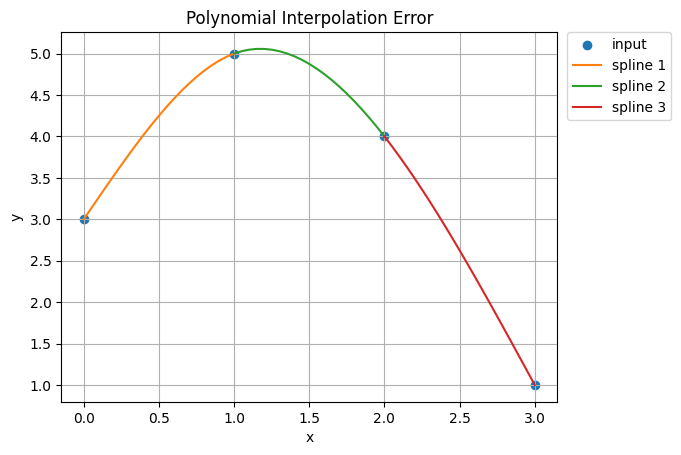

In [ ]:
#Question Three
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial as npp

def main():
  xs = [0,1,2,3]
  ys = [3,5,4,1]
  n = len(ys)

  δ = []
  Δ = []
  for i in range(n-1):
    δ.append(xs[i+1]-xs[i])
    Δ.append(ys[i+1]-ys[i])

  lhs = np.zeros((n,n))
  rhs = np.zeros((n))
  lhs[0,0] = 1; lhs[-1,-1] = 1
  for i in range(1,n-1):
    lhs[i,i-1] = δ[i-1]
    lhs[i,i] = 2*(δ[i-1]+δ[i])
    lhs[i,i+1] = δ[i]
    rhs[i] = 3*(Δ[i]/δ[i] - Δ[i-1]/δ[i-1])
  cs = np.linalg.solve(lhs,rhs)

  bs = []
  ds = []
  for i in range(n-1):
    ds.append((cs[i+1]-cs[i])/(3*δ[i]))
    bs.append(Δ[i]/δ[i] - (2*cs[i] + cs[i+1])*δ[i]/3)

  coeffs = []
  ss = []
  for i in range(n-1):
    if xs[i] != 0:
      coeffs.append([ds[i],cs[i],bs[i],ys[i]])
      ss.append(np.poly1d(coeffs[i],variable ="(x-"+str(xs[i])+")"))
    else:
      coeffs.append([ys[i],bs[i],cs[i],ds[i]])
      ss.append(npp.Polynomial(coeffs[i]))

  for i,s in enumerate(ss):
    print(f"\nspline {i+1} : \n\n{s}")

  plt.scatter(xs,ys,marker="o",label="input")

  for i,s in enumerate(ss):
    xs_i = np.linspace(xs[i],xs[i+1],21)
    if xs[i] != 0:
      ys_i = s(xs_i - xs[i])
    else:
      ys_i = s(xs_i)
    plt.plot(xs_i,ys_i,c="C"+str(i+1),label="spline "+str(i+1))

  plt.grid()
  plt.title(f"Polynomial Interpolation Error")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("y")
  plt.xlabel("x")
  plt.show()

if __name__ == "__main__":
  main()
